In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp
import networkx as nx

import sys

In [2]:
sys.path.append('../')

# 1. Read learned dictionaries.

In [3]:
# p2root = '../new_results_logging/'
p2root = '../results_0905_logging/'

K = 25
version='Rr'
iteration = 10000
iid_sample = 20000
chromo = 'chr2L'
expr_name = f'{chromo}_drosophila_ChIA_Drop_0.1_PASS'
prefix = f'{expr_name}_{iid_sample}_MCMC_pivot_K_{K}_iter_{iteration}'
# p2nmf_dict = osp.join(p2root, f'{prefix}_nmf_centroid_df')
# p2cmf_dict = osp.join(p2root, f'{prefix}_cmf_centroid_df')
# p2omf_dict = osp.join(p2root, f'{prefix}_omf_centroid_df')

p2ocmf_dict = osp.join(p2root, f'{version}_{prefix}_ocmf_centroid_df')
p2representative_regions = osp.join(p2root, f'{version}_{prefix}_x_hat_df')
p2A_t = osp.join(p2root, f'A_t_{version}_{prefix}_ocmf.csv')
p2W_hat = osp.join(p2root, f'W_hat_{version}_{prefix}_ocmf.csv')
p2X = osp.join(p2root, f'{prefix}_X_df')

In [4]:
X_df = pd.read_pickle(p2X)
# nmf_dict = pd.read_pickle(p2nmf_dict)
# cmf_dict = pd.read_pickle(p2cmf_dict)
# omf_dict = pd.read_pickle(p2omf_dict)
ocmf_dict = pd.read_pickle(p2ocmf_dict)
rep_region = pd.read_pickle(p2representative_regions)

In [5]:
W_hat = np.loadtxt(p2W_hat, delimiter=',')
A_t = np.loadtxt(p2A_t, delimiter=',')

<AxesSubplot:>

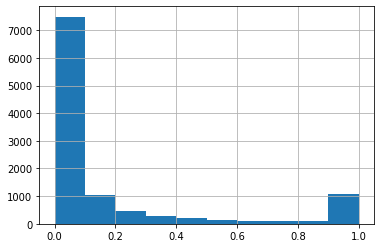

In [6]:
feature = [x for x in ocmf_dict.columns if 'label' not in x]
ocmf_dict_val_df = ocmf_dict[feature]
ocmf_dict_val_df.stack().hist()

# 2. Read original data for NDL

In [7]:
# p2raw_data = '/data/shared/jianhao/online_cvxNDL_data/new_data_with_node_id/'
p2raw_data = '/data/shared/jianhao/online_cvxNDL_data/updated_0905_data_with_node_id'
p2emb = osp.join(p2raw_data, f'df_{expr_name}_{iid_sample}_MCMC_pivot_sample_node_matrix')
p2raw_data = osp.join(p2raw_data, f'df_{expr_name}_{iid_sample}_MCMC_pivot')

In [8]:
df_node_all = pd.read_pickle(p2emb)
df_subgraph_all = pd.read_pickle(p2raw_data).drop(columns = ['label'])

In [9]:
# df_node_all = df_node_all.applymap(lambda s: s.replace('"', ''))

In [10]:
df_node_all

,node_0,node_1,node_2,node_3,node_4,node_5,node_6,node_7,node_8,node_9,...,node_11,node_12,node_13,node_14,node_15,node_16,node_17,node_18,node_19,node_20
0,V5997,V19835,V969,V961,V2405,V20728,V20814,V20728,V26131,V20728,...,V20728,V27017,V6131,V11815,V4455,V11815,V6131,V4455,V27017,V27025
1,V41207,V22040,V41207,V22040,V41207,V22040,V36348,V41207,V22040,V20407,...,V4078,V186,V250,V135,V14276,V135,V19913,V135,V186,V153
2,V13615,V16412,V16377,V14431,V16377,V16412,V16400,V16412,V16256,V14432,...,V44859,V41989,V14432,V15932,V41989,V15932,V27666,V41754,V41780,V41767
3,V7474,V7462,V87,V16766,V2911,V1000,V1035,V35092,V35449,V35092,...,V6371,V35017,V1035,V1000,V954,V19311,V9257,V42290,V42241,V34944
4,V7474,V7462,V5357,V4394,V5357,V7462,V7497,V16411,V39787,V500,...,V39428,V39553,V39351,V39428,V25400,V25623,V258,V27057,V34954,V3538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,V39624,V42442,V2820,V18992,V7395,V18992,V16630,V12679,V1020,V1083,...,V36334,V4157,V36334,V37139,V969,V16023,V969,V35164,V969,V218
19996,V26447,V27659,V27672,V19229,V43360,V34901,V324,V6740,V324,V32512,...,V16411,V27231,V26418,V10942,V20765,V32906,V32787,V33273,V41480,V31699
19997,V39599,V9995,V38842,V16847,V4306,V1057,V985,V42527,V42478,V13003,...,V29664,V33223,V33250,V27114,V27156,V20854,V20824,V33868,V20856,V14348
19998,V39954,V9995,V10131,V9998,V27680,V9998,V1665,V1656,V1665,V1644,...,V38189,V1280,V2259,V18030,V2259,V2117,V2243,V2117,V2259,V2251


In [11]:
df_subgraph_all

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_431,dim_432,dim_433,dim_434,dim_435,dim_436,dim_437,dim_438,dim_439,dim_440
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


check if input to NDL is same as raw data.

In [12]:
(X_df.values == df_subgraph_all.values).all()

True

# 3. Read Original Graph in networkx, draw adjacency

In [13]:
def read_networks_as_graph(path, if_DNA_string=True, node_range=None):
    if if_DNA_string:
        cur_df = pd.read_csv(path, index_col = 0)
        edgelist = list(cur_df.apply(lambda x: (x.edge_list.split(',')), axis = 1).values)
#         edgelist = np.genfromtxt(path, delimiter=',', dtype=str, skip_header=1)
#         edgelist = edgelist[:, 1:]
#         edgelist = edgelist.tolist()
        if 'ChIA_Drop' not in path:
            ### Delete unwanted characters
            for edge in edgelist:
                edge[0] = edge[0][3:-1]
                edge[1] = edge[1][2:-3]
    else:
        edgelist = np.genfromtxt(path, delimiter=',', dtype=str)
        edgelist = edgelist.tolist()

    G = nx.Graph()
    G.add_edges_from(edgelist)

    print('number of nodes=', len(G.nodes))
    print('number of edges=', len(G.edges))
    return G

In [14]:
onlyfiles = ['edge_list_of_chr4_drosophila_ChIA_Drop_0.1_PASS.txt',
             'edge_list_of_chrX_drosophila_ChIA_Drop_0.1_PASS.txt',
             'edge_list_of_chr2L_drosophila_ChIA_Drop_0.1_PASS.txt',
             'edge_list_of_chr3L_drosophila_ChIA_Drop_0.1_PASS.txt',
             'edge_list_of_chr2R_drosophila_ChIA_Drop_0.1_PASS.txt',
             'edge_list_of_chr3R_drosophila_ChIA_Drop_0.1_PASS.txt']

In [15]:
chromo

'chr2L'

In [16]:
for DNA in onlyfiles:
    if chromo not in DNA:
        continue
    directory = "/home/jianhao2/NMF-DNA/Data/DNA/"
    path = osp.join(directory, DNA)
    network_name = DNA.replace('.txt', '')
    network_name = network_name.replace('edge_list_of_', '')
    print('Currently learning dictionary patches from DNA: ' + str(network_name))
    
    H = read_networks_as_graph(path, if_DNA_string= True, node_range = None)
    
    # reorder G in node 

Currently learning dictionary patches from DNA: chr2L_drosophila_ChIA_Drop_0.1_PASS
number of nodes= 20262
number of edges= 56803


In [17]:
num_nodes_in_sample = np.unique(df_node_all.head(iteration)).shape[0]
sample_coverage = num_nodes_in_sample / len(H.nodes)
print(num_nodes_in_sample)
print(f'sampled node coverage: {sample_coverage * 100:.2f}')

19300
sampled node coverage: 95.25


In [18]:
nodes = list(H.nodes(data = True))
edges = list(H.edges(data = True))

node_pos = np.array([int(x[0][1:]) for x in nodes])
new_node_order = node_pos.argsort()

new_node_pos = node_pos[new_node_order]
new_nodes = [nodes[i] for i in new_node_order]

G = nx.Graph()
G.add_nodes_from(new_nodes)
G.add_edges_from(edges)

In [19]:
list(G.nodes)[:3]

['V13', 'V14', 'V15']

In [20]:
list(G.edges)[:3]

[('V13', 'V42624'), ('V13', 'V14088'), ('V14', 'V37975')]

In [21]:
Adj = nx.to_numpy_array(G)

In [22]:
Adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
np.sum(Adj) / (Adj.shape[0] * Adj.shape[1])

0.0002767175136498563

## Draw diagonal blocks of Adj

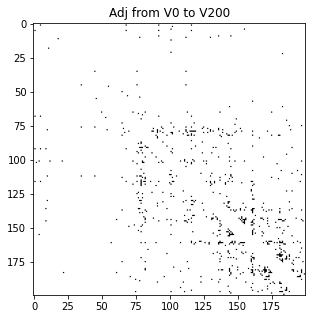

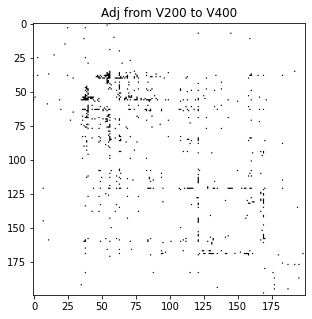

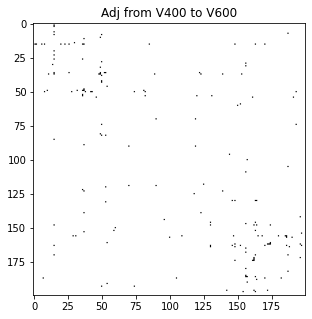

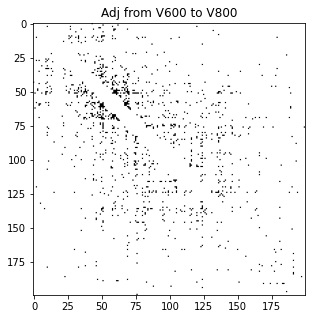

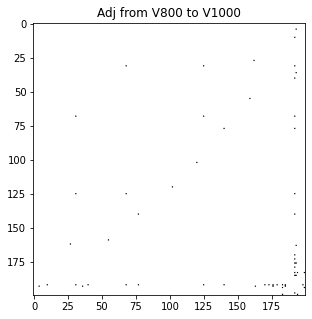

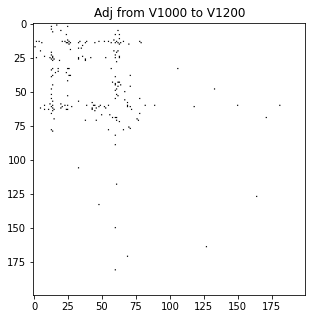

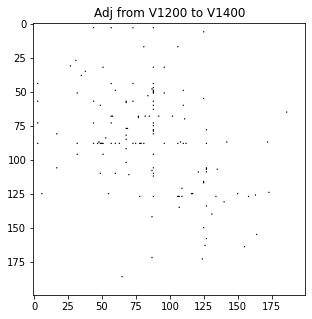

In [70]:
step_size = 200

for start_idx in np.arange(0, len(G.nodes), step_size):
    end_idx = start_idx + step_size
    if end_idx >= len(G.nodes):
        break
        
    selected_row = np.arange(start_idx, end_idx)
    Subgraph = Adj[selected_row, :][:, selected_row]
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot()

    ax.imshow(Subgraph, cmap = 'Greys')
    plt.title(f'Adj from V{start_idx} to V{end_idx}')
    plt.show()
    plt.close()
    
    if start_idx > 1000:
        break

# 4. Iterate over rows in raw data. Reconstruct with learned dictionaries.

In [25]:
from sklearn.linear_model import Lasso
from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings('ignore')
tqdm.pandas()


In [26]:
def reconstruct_row(row, D_hat):
    x_sample = row.values
    lars_lasso = Lasso(alpha = 0, max_iter = 500)
    lars_lasso.fit(D_hat.T, x_sample)
    
    alpha = lars_lasso.coef_
    
    x_hat = D_hat.T @ alpha
    return x_hat

In [27]:
test_df = df_subgraph_all

In [28]:
D_hat = ocmf_dict_val_df.values

reconstruted_X = np.vstack(test_df.progress_apply(lambda row: reconstruct_row(row, D_hat), axis = 1).values)

In [29]:
df_reconstruted_X = pd.DataFrame(reconstruted_X, columns= df_subgraph_all.columns)

In [30]:
df_reconstruted_X

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_431,dim_432,dim_433,dim_434,dim_435,dim_436,dim_437,dim_438,dim_439,dim_440
0,0.0,1.012699,0.398480,0.521187,0.365560,-0.384993,0.068117,-0.069609,0.021171,0.053827,...,-0.013502,0.629716,0.338633,0.306997,0.043572,0.413801,0.192510,0.264251,1.012699,0.0
1,0.0,0.928954,0.059804,1.216801,0.146347,0.586844,0.562426,0.163760,0.257317,-0.022056,...,0.123442,0.736501,0.476713,0.226787,0.157473,0.266039,0.356277,0.469680,0.928954,0.0
2,0.0,1.029626,0.221448,0.410643,0.297212,0.653279,-0.048397,0.461581,0.060031,0.248017,...,0.063311,0.153922,0.039307,0.144434,-0.176879,-0.066679,-0.135697,0.137186,1.029626,0.0
3,0.0,0.976535,-0.050125,0.050941,-0.159769,-0.267437,-0.110734,-0.098447,-0.121393,-0.025198,...,-0.012831,-0.046098,-0.210347,0.119597,-0.017512,0.155685,0.119591,0.310198,0.976535,0.0
4,0.0,0.991937,0.138493,0.121319,0.251379,0.330641,0.043167,0.147457,0.045364,0.038614,...,-0.052459,-0.114297,-0.064183,0.004339,0.016600,-0.024885,0.082460,0.036369,0.991937,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.017583,-0.076341,-0.131313,-0.003784,0.218220,-0.082828,0.069276,-0.011068,0.059657,...,0.206942,0.027817,0.124652,0.120328,0.894462,0.187065,1.130621,0.224750,1.017583,0.0
19996,0.0,0.982276,0.134598,0.001346,-0.005749,-0.150870,-0.059690,-0.048916,-0.003408,-0.018130,...,-0.109817,-0.073198,-0.123428,-0.033950,-0.013472,-0.067178,0.093033,-0.002546,0.982276,0.0
19997,0.0,0.968019,0.061336,-0.114303,0.014024,-0.089918,-0.070234,-0.039600,-0.034068,-0.032555,...,-0.088928,-0.035646,-0.139094,0.037200,-0.042937,0.045770,0.068901,0.115136,0.968019,0.0
19998,0.0,0.996789,0.063606,-0.098559,-0.036421,-0.037762,-0.110178,0.069227,-0.052732,0.094118,...,0.149368,0.241839,0.518796,0.072669,0.513822,0.081797,0.265787,0.052922,0.996789,0.0


### Compared with random D_hat

In [31]:
D_rand = np.random.uniform(size = D_hat.shape)
random_recon_X = np.vstack(df_subgraph_all.progress_apply(lambda row: reconstruct_row(row, D_rand), axis = 1).values)

In [32]:
df_random_reconstruted_X = pd.DataFrame(random_recon_X, columns= df_subgraph_all.columns)


In [33]:
df_random_reconstruted_X

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_431,dim_432,dim_433,dim_434,dim_435,dim_436,dim_437,dim_438,dim_439,dim_440
0,0.002117,-0.093732,-0.076736,-0.188191,0.041850,-0.026572,-0.123784,-0.139584,-0.039583,-0.074437,...,-0.194791,-0.093565,-0.183743,-0.110218,-0.099706,-0.154964,-0.174075,0.024814,0.114305,-0.209861
1,-0.078796,-0.247495,-0.111500,-0.254388,-0.254275,-0.179539,-0.096741,-0.226805,-0.091285,-0.450270,...,-0.185405,-0.212881,-0.273044,-0.125091,-0.248613,-0.077555,-0.180347,-0.019059,-0.268082,-0.323011
2,-0.069698,-0.307991,-0.151892,-0.310516,-0.239837,-0.084208,-0.193435,-0.182851,-0.226990,-0.139927,...,-0.384587,-0.170371,-0.440064,-0.330794,-0.275160,-0.299337,-0.357758,-0.094032,-0.220810,-0.269725
3,-0.195207,-0.234377,-0.285791,-0.427668,-0.223541,-0.294331,-0.267722,-0.200733,-0.279889,-0.271163,...,-0.347002,-0.418300,-0.428190,-0.418560,-0.322136,-0.326800,-0.413112,-0.295897,-0.119280,-0.349232
4,-0.170331,-0.345318,-0.289296,-0.429773,-0.292700,-0.320327,-0.315048,-0.165205,-0.261368,-0.250004,...,-0.268150,-0.266053,-0.455207,-0.453370,-0.256643,-0.416446,-0.318165,-0.283403,-0.296302,-0.284659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.099563,-0.171236,-0.193760,-0.299441,-0.170366,-0.177756,-0.202047,-0.109320,-0.164967,-0.166724,...,-0.237168,-0.289116,-0.299955,-0.230355,-0.190399,-0.175462,-0.136406,-0.073470,-0.186730,-0.162234
19996,-0.073468,-0.143363,-0.127461,-0.196299,-0.112197,-0.185838,-0.143705,-0.091385,-0.126145,-0.169072,...,-0.169654,-0.210473,-0.214269,-0.209255,-0.205913,-0.254734,-0.218824,-0.191630,-0.048398,-0.119495
19997,-0.153221,-0.188659,-0.242582,-0.360313,-0.154810,-0.260445,-0.242454,-0.157466,-0.200199,-0.177113,...,-0.288239,-0.324618,-0.345909,-0.299284,-0.259025,-0.339610,-0.274605,-0.248861,-0.160376,-0.211659
19998,-0.223600,-0.146806,-0.287387,-0.369104,-0.338321,-0.286481,-0.187018,-0.220806,-0.152434,-0.231032,...,-0.190385,-0.385464,-0.307337,-0.244206,-0.201315,-0.281103,-0.190025,-0.143573,-0.298369,-0.319010


## Compare the raw sample and reconstructed samples

In [77]:
p2base_line_recon = '/data/shared/jianhao/online_cvxNDL_results/baseline_methods'

df_nmf_recon_X = pd.read_pickle(osp.join(p2base_line_recon, f'{chromo}_nmf_recon_X_df.pickle'))
df_cmf_recon_X = pd.read_pickle(osp.join(p2base_line_recon, f'{chromo}_cmf_recon_X_df.pickle'))
df_omf_recon_X = pd.read_pickle(osp.join(p2base_line_recon, f'{chromo}_omf_recon_X_df.pickle'))

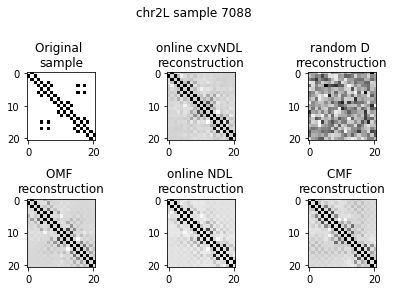

-------


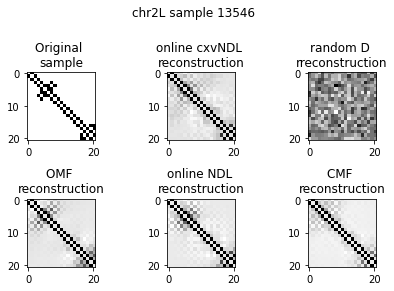

-------


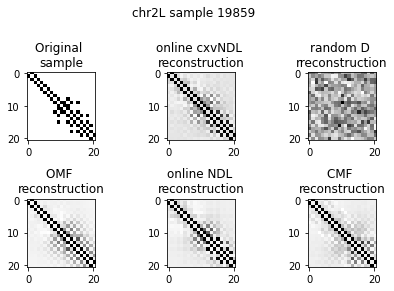

-------


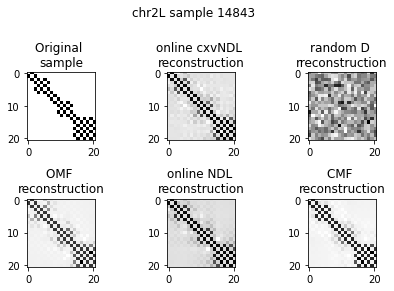

-------


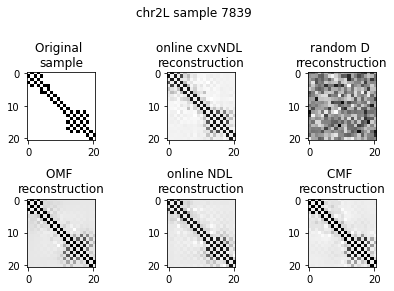

-------


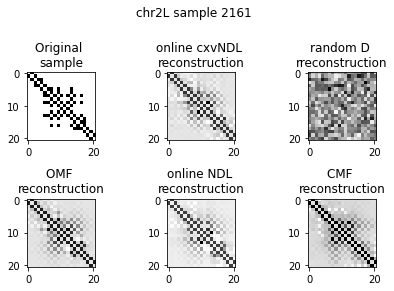

-------


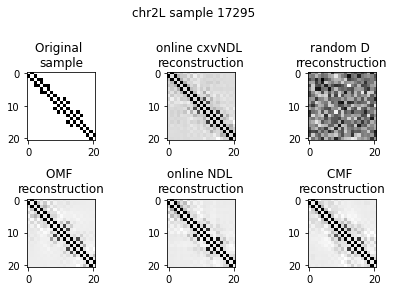

-------


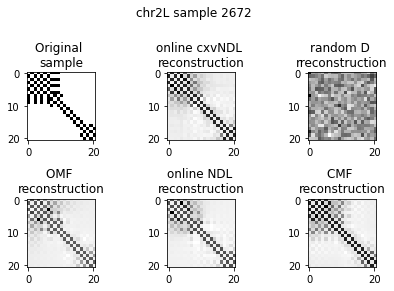

-------


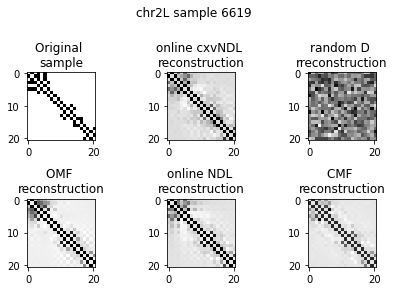

-------


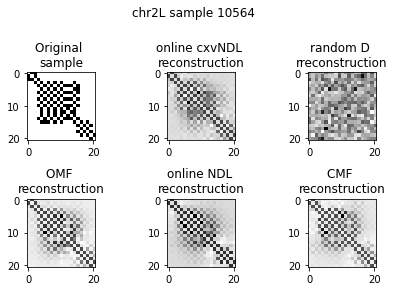

-------


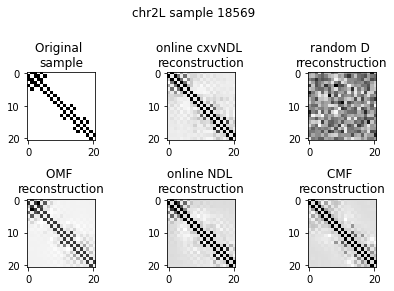

-------


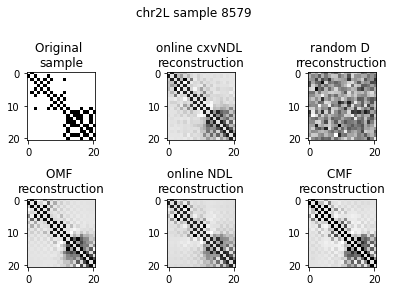

-------


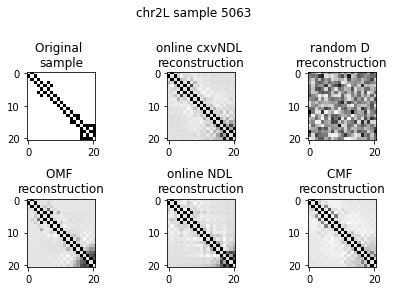

-------


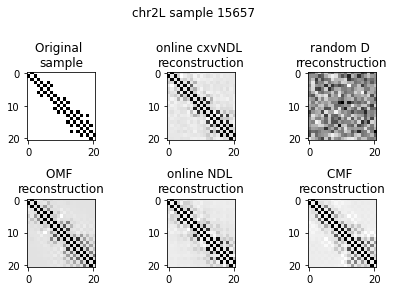

-------


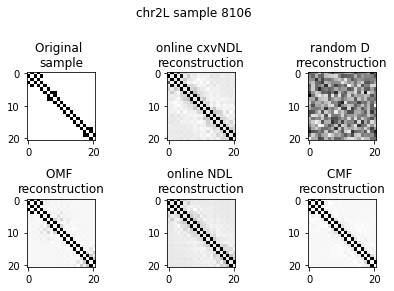

-------


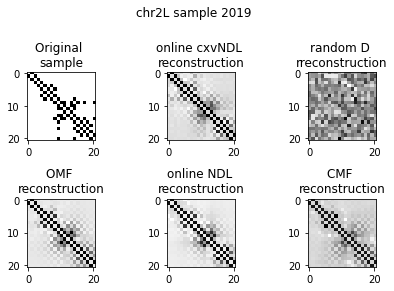

-------


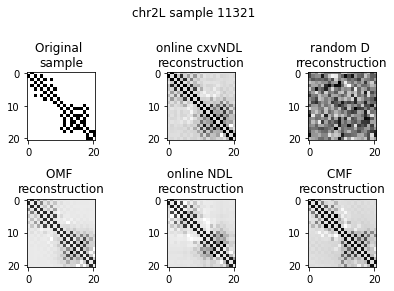

-------


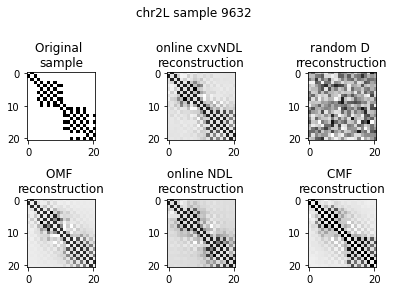

-------


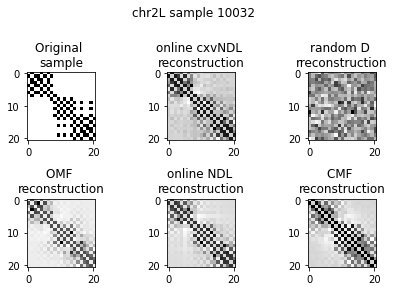

-------


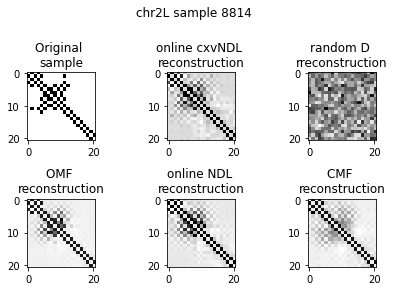

-------


In [82]:
np.random.seed(37)
for idx in np.random.choice(df_reconstruted_X.index, 20, replace = False):
    x_hat = df_reconstruted_X.loc[idx].values
    x_raw = df_subgraph_all.loc[idx].values
    x_random_recon = df_random_reconstruted_X.loc[idx].values
    
    fig = plt.figure()
    axes = fig.subplots(2, 3)
    
    k = 21
    axes[0][0].imshow(x_raw.reshape(k, k), cmap = 'Greys')
    axes[0][0].set_title('Original \nsample')
    axes[0][1].imshow(x_hat.reshape(k, k), cmap = 'Greys')
    axes[0][1].set_title('online cxvNDL \nreconstruction')
    axes[0][2].imshow(x_random_recon.reshape(k, k), cmap = 'Greys')
    axes[0][2].set_title('random D \nrreconstruction')
    
    # add base line comparison. 
    x_hat_nmf = df_nmf_recon_X.loc[idx].values
    x_hat_cmf = df_cmf_recon_X.loc[idx].values
    x_hat_omf = df_omf_recon_X.loc[idx].values
    axes[1][0].imshow(x_hat_nmf.reshape(k, k), cmap = 'Greys')
    axes[1][0].set_title('OMF \nreconstruction')
    axes[1][1].imshow(x_hat_omf.reshape(k, k), cmap = 'Greys')
    axes[1][1].set_title('online NDL \nreconstruction')
    axes[1][2].imshow(x_hat_cmf.reshape(k, k), cmap = 'Greys')
    axes[1][2].set_title('CMF \nreconstruction')
    
    plt.suptitle(f'{chromo} sample {idx}', y = 1)
    plt.tight_layout()
    plt.show()
    plt.close()
    print('-' * 7)
    
#     if idx >= 10:
#         break
    

# 5. Combined reconstructed data with df_node_all. Generate graph adj. 

In [35]:
adj_hat = np.zeros_like(Adj)
random_adj_hat = np.zeros_like(Adj)

nodes_list = list(G.nodes())

for idx in tqdm(df_reconstruted_X.index):
# for idx in tqdm(df_random_reconstruted_X.index):
    x_hat = df_reconstruted_X.loc[idx].values
    x_random_recon = df_random_reconstruted_X.loc[idx].values
    
    x_hat_nodes_id = df_node_all.loc[idx].values.tolist()
    
    k = len(x_hat_nodes_id)
    cur_adj = x_hat.reshape(k, k)
    random_recon_adj = x_random_recon.reshape(k, k)
    
    idx_for_update = np.array([nodes_list.index(x) for x in x_hat_nodes_id])
    
    adj_hat[idx_for_update[:, np.newaxis], idx_for_update] += cur_adj
    random_adj_hat[idx_for_update[:, np.newaxis], idx_for_update] += random_recon_adj
    


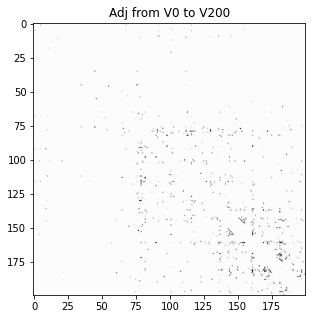

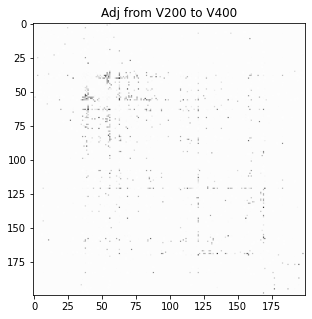

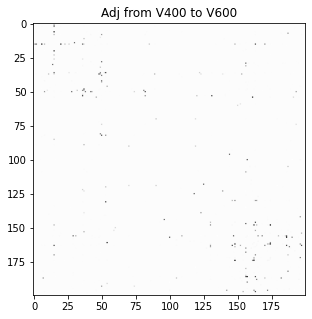

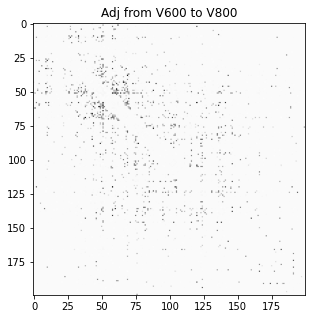

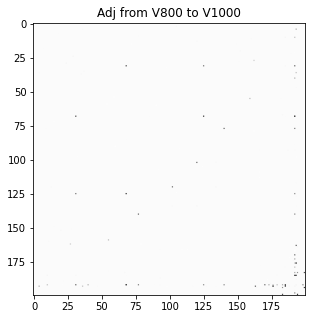

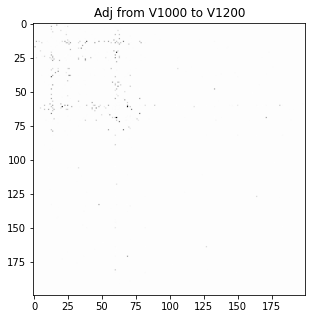

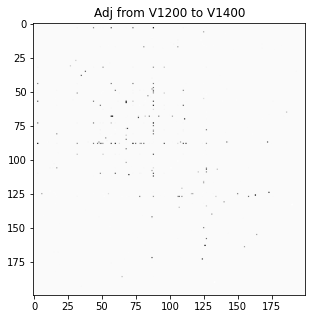

In [36]:
step_size = 200

for start_idx in np.arange(0, len(G.nodes), step_size):
    end_idx = start_idx + step_size
    if end_idx >= len(G.nodes):
        break
        
    selected_row = np.arange(start_idx, end_idx)
#     Subgraph = random_adj_hat[selected_row, :][:, selected_row]
    Subgraph = adj_hat[selected_row, :][:, selected_row]
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot()

    ax.imshow(Subgraph, cmap = 'Greys')
    plt.title(f'Adj from V{start_idx} to V{end_idx}')
    plt.show()
    plt.close()
    
    if start_idx > 1000:
        break

# 6. Error between reconstruction and original Adj

In [37]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [38]:
average_precision_score(Adj.flatten(), adj_hat.flatten())

0.9954500766815318

In [84]:
average_precision_score(Adj.flatten(), random_adj_hat.flatten())

0.000710915829847482

In [40]:
roc_auc_score(Adj.flatten(), adj_hat.flatten())

0.9981033825558752

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Adj.flatten(), adj_hat.flatten())

In [42]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99999998, 0.99999999,
        1.        ]),
 array([0.00000000e+00, 1.76047040e-05, 3.34489376e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([22.18189845, 21.18189845, 16.02520627, ..., -0.73713597,
        -0.76881137, -0.87346463]))

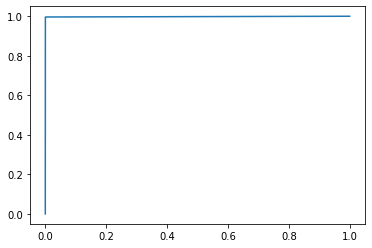

In [43]:
plt.plot(fpr, tpr)

### Calculate the MSE of adj.

In [44]:
((adj_hat - Adj)**2).sum() / (adj_hat.shape[0] * adj_hat.shape[1])

0.007666290955532729

In [45]:
Adj.nonzero()[0].shape

(113606,)

In [62]:
cutoff = thresholds[np.where(tpr > 0.5)][0]
cutoff = 0.7
np.where(adj_hat > cutoff)[0].shape, cutoff

((118740,), 0.7)

In [67]:
np.where(random_adj_hat > 0.08)[0].shape, cutoff


((114470,), 0.7)

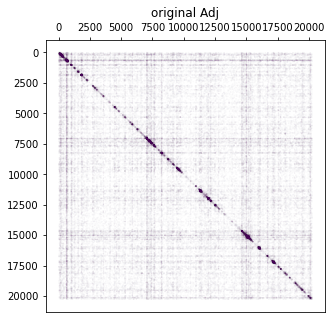

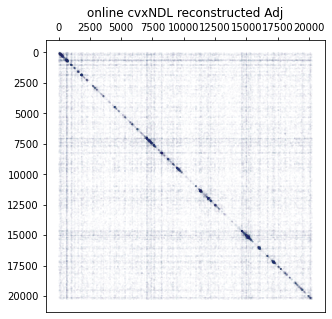

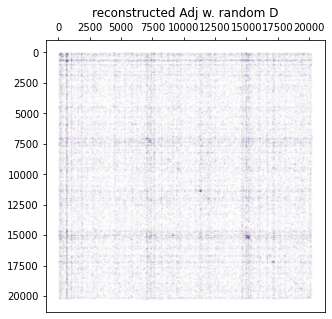

In [83]:
x, y = Adj.nonzero()

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()


ax.scatter(x, y, c = Adj[x, y], s = 1e-4)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

ax.yaxis.tick_left()
ax.set_title('original Adj')
plt.show()
plt.close()
# -----
x, y = np.where(adj_hat > cutoff)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()


ax.scatter(x, y, c = adj_hat[x, y]/ adj_hat.max(), s = 1e-4)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

ax.yaxis.tick_left()
ax.set_title('online cvxNDL reconstructed Adj')
plt.show()
plt.close()
# -----
x, y = np.where(random_adj_hat > 0.08)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()


ax.scatter(x, y, c = random_adj_hat[x, y] / random_adj_hat.max(), s = 1e-4)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

ax.yaxis.tick_left()
ax.set_title('reconstructed Adj w. random D')
plt.show()
plt.close()

-----
# Debugging

In [48]:
A = [
    [2, 1.51, 0, 1.71, 0],
    [0, 0, 2.11, 1.81, 2.31],
    [0, 0, 0, 1.31, 1.41],
    [0, 0, 0, 0, 1.11],
    [0, 0, 0, 0, 0]]

labels = ['alice', 'bob', 'bob', 'dan', 'ellie']

In [49]:
A2 = pd.DataFrame(A, index=labels, columns=labels)

In [50]:
A2

,alice,bob,bob,dan,ellie
alice,2,1.51,0.00,1.71,0.00
bob,0,0.00,2.11,1.81,2.31
bob,0,0.00,0.00,1.31,1.41
dan,0,0.00,0.00,0.00,1.11
ellie,0,0.00,0.00,0.00,0.00


In [51]:
A2.values[[np.arange(len(A2))] * 2] = np.nan
tmp_df = A2.stack().reset_index()

In [52]:
tmp_df = tmp_df[tmp_df[0] != 0]

In [53]:
tmp_df

,level_0,level_1,0
0,alice,alice,2.00
1,alice,bob,1.51
3,alice,dan,1.71
7,bob,bob,2.11
8,bob,dan,1.81
9,bob,ellie,2.31
13,bob,dan,1.31
14,bob,ellie,1.41
19,dan,ellie,1.11


In [54]:
tmp_df.shape

(9, 3)

In [55]:
test_df = nx.Graph()

test_df.add_edges_from(tmp_df[['level_0' , 'level_1']].values)

In [56]:
len(test_df.edges())

7

In [57]:
len(test_grpah.edges())

NameError: name 'test_grpah' is not defined

In [ ]:
A.shape

In [ ]:
test_grpah.nodes

In [ ]:
test_grpah.edges

In [ ]:
test_g = nx.Graph()
tmp_edge_list = [[0, 1, 1],
                 [1, 2, 1],
                 [0, 1, 2]]
test_g.add_weighted_edges_from(tmp_edge_list)

In [ ]:
test_g.edges(data = True)